In [1]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import praw
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YAhia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
reddit=praw.Reddit(
    client_id="",
    client_secret="",
    user_agent="Scraper"
)



In [3]:
ids,headlines,authors,created_utcs,upvotes,upvotesPercentage,urls,numcomments=[],[],[],[],[],[],[],[]

for subred in reddit.subreddit('Palestine').hot(limit=None):
  ids.append(subred.id)
  headlines.append(subred.title)
  authors.append(subred.author)
  times = subred.created_utc
  datetimes = datetime.utcfromtimestamp(times)
  created_utcs.append(datetimes.strftime('%Y-%m-%d'))
  upvotes.append(subred.score)
  upvotesPercentage.append(subred.upvote_ratio)
  urls.append(subred.url)
  numcomments.append(subred.num_comments)
data={
    'ID':ids,
    'Titre':headlines,
    'Auteur':authors,
    'Temps de création':created_utcs,
    'Up votes':upvotes,
    'Poucentage des up votes':upvotesPercentage,
    'Nombre de commentaire':numcomments
}
df=pd.DataFrame(data)
df

,ID,Titre,Auteur,Temps de création,Up votes,Poucentage des up votes,Nombre de commentaire
0,18ext8v,🇵🇸 📢 Megathread and Discord Alert! 📢🇵🇸 - Dec 10th,sabbah,2023-12-10,68,0.95,83
1,194pudv,South Africa presents its case against Israel ...,sabbah,2024-01-12,173,0.94,23
2,198xy1r,"Palestinian Christian Humiliats Zionist ""Journ...",No_Sun_8930,2024-01-17,959,0.94,34
3,198s716,Gaza’s children,polien,2024-01-17,701,0.98,21
4,198vqey,American logic,huth_13,2024-01-17,321,0.98,8
...,...,...,...,...,...,...,...
662,1912hum,BBC News is a joke,OutsideMeal,2024-01-07,481,0.98,18
663,191krho,A rational analysis of why Arab states don't s...,Milchstrasse94,2024-01-08,23,0.83,25
664,190wbey,I couldn't find anything study linking crows w...,Elon-Zusk,2024-01-07,931,0.97,146
665,191mex8,Who are Yemen's 'Houthis'? Why are they attack...,EnterTamed,2024-01-08,16,0.83,1


In [4]:
df.to_csv('Palestine.csv',encoding='utf-8')

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YAhia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
pol_score = SIA().polarity_scores(df['Titre'][0])
sia = SIA()
results=[]
for line,date in zip(df['Titre'],df['Temps de création']):
  pol_score['Date'] = date
  pol_score['Titre'] = line
  pol_score=sia.polarity_scores(line)
  results.append(pol_score)
df_score=pd.DataFrame.from_records(results)
df_score


,neg,neu,pos,compound,Date,Titre
0,0.267,0.536,0.197,-0.2003,2024-01-12,South Africa presents its case against Israel ...
1,0.000,1.000,0.000,0.0000,2024-01-17,"Palestinian Christian Humiliats Zionist ""Journ..."
2,0.000,1.000,0.000,0.0000,2024-01-17,Gaza’s children
3,0.000,1.000,0.000,0.0000,2024-01-17,American logic
4,0.000,1.000,0.000,0.0000,2024-01-17,A deaf Palestinian expresses his joy after get...
...,...,...,...,...,...,...
662,0.000,0.577,0.423,0.2960,2024-01-08,A rational analysis of why Arab states don't s...
663,0.000,1.000,0.000,0.0000,2024-01-07,I couldn't find anything study linking crows w...
664,0.000,0.673,0.327,0.7783,2024-01-08,Who are Yemen's 'Houthis'? Why are they attack...
665,0.219,0.781,0.000,-0.5204,2023-12-21,BDS Belfast were out last night again removing...


In [9]:
df_score['Score']=0
df_score.loc[df_score['compound']<-0.2,'Score']=-1
df_score.loc[df_score['compound']>0.2,'Score']=1
df_score

,neg,neu,pos,compound,Date,Titre,Score
0,0.267,0.536,0.197,-0.2003,2024-01-12,South Africa presents its case against Israel ...,-1
1,0.000,1.000,0.000,0.0000,2024-01-17,"Palestinian Christian Humiliats Zionist ""Journ...",0
2,0.000,1.000,0.000,0.0000,2024-01-17,Gaza’s children,0
3,0.000,1.000,0.000,0.0000,2024-01-17,American logic,0
4,0.000,1.000,0.000,0.0000,2024-01-17,A deaf Palestinian expresses his joy after get...,0
...,...,...,...,...,...,...,...
662,0.000,0.577,0.423,0.2960,2024-01-08,A rational analysis of why Arab states don't s...,1
663,0.000,1.000,0.000,0.0000,2024-01-07,I couldn't find anything study linking crows w...,0
664,0.000,0.673,0.327,0.7783,2024-01-08,Who are Yemen's 'Houthis'? Why are they attack...,1
665,0.219,0.781,0.000,-0.5204,2023-12-21,BDS Belfast were out last night again removing...,-1


In [10]:
df_score=df_score[['Date','Titre','Score']]
df_score

,Date,Titre,Score
0,2024-01-12,South Africa presents its case against Israel ...,-1
1,2024-01-17,"Palestinian Christian Humiliats Zionist ""Journ...",0
2,2024-01-17,Gaza’s children,0
3,2024-01-17,American logic,0
4,2024-01-17,A deaf Palestinian expresses his joy after get...,0
...,...,...,...
662,2024-01-08,A rational analysis of why Arab states don't s...,1
663,2024-01-07,I couldn't find anything study linking crows w...,0
664,2024-01-08,Who are Yemen's 'Houthis'? Why are they attack...,1
665,2023-12-21,BDS Belfast were out last night again removing...,-1


In [11]:
df_score.to_csv('headlines_score.csv',encoding='utf-8',index=False)

In [12]:
df_score.Score.value_counts()

 0    288
-1    252
 1    127
Name: Score, dtype: int64

In [13]:
df_score.Score.value_counts(normalize=True)*100

 0    43.178411
-1    37.781109
 1    19.040480
Name: Score, dtype: float64

In [14]:
print("Quelque positive headlines:")
pprint(list(df_score[df_score['Score']==1].Titre)[:5],width=200)

print("____________________________________________________________________________________________________________")

print("Quelque neutre headlines:")
pprint(list(df_score[df_score['Score']==0].Titre)[:5],width=200)

print("____________________________________________________________________________________________________________")

print("Quelque negative headlines:")
pprint(list(df_score[df_score['Score']==-1].Titre)[:5],width=200)

Quelque positive headlines:
['Israeli government spokesman Eylon Levy admits that IOF targeted journalists and reporters because they were khamas.',
 'An update from Bisan',
 'Israel destroys more than 3,000 trees in West Bank.',
 'They encourage genocide while simultaneously claiming there is no genocide occuring',
 '🇪🇬🇵🇸 - Protestors in Cairo, Egypt chanted,: "They did it, Mandela\'s grandchildren, while we are in fear, shame, and humiliation," expressing solidarity with South Africa\'s case against the '
 'Israeli war on Gaza.']
____________________________________________________________________________________________________________
Quelque neutre headlines:
['Palestinian Christian Humiliats Zionist "Journalist"',
 'Gaza’s children',
 'American logic',
 'A deaf Palestinian expresses his joy after getting a sack of wheat',
 'A sample of the racism faced by Arab Israeli citizens living in Israel']
_____________________________________________________________________________________

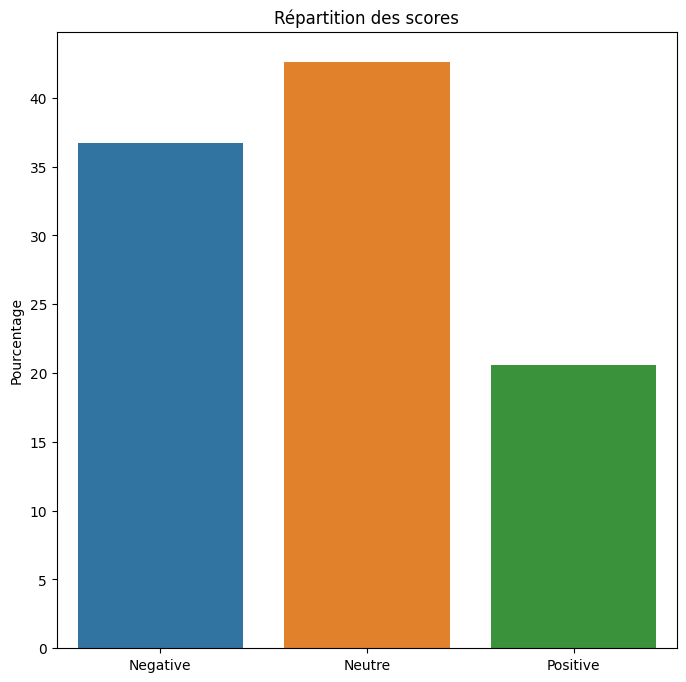

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
counts=df_score.Score.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['Negative','Neutre','Positive'])
ax.set_ylabel('Pourcentage')
ax.set_title('Répartition des scores')
plt.show()

In [15]:
dates=set()
for date in df['Temps de création']:
  dates.add(date)
print(dates)

{'2023-12-21', '2024-01-10', '2024-01-14', '2024-01-13', '2023-12-10', '2024-01-17', '2024-01-11', '2024-01-16', '2024-01-12', '2024-01-07', '2024-01-15', '2024-01-08', '2024-01-09'}


In [16]:
df['Temps de création'].value_counts()

2024-01-14    88
2024-01-13    82
2024-01-12    81
2024-01-15    79
2024-01-11    65
2024-01-10    62
2024-01-09    59
2024-01-16    53
2024-01-17    46
2024-01-08    44
2024-01-07     6
2023-12-10     1
2023-12-21     1
Name: Temps de création, dtype: int64

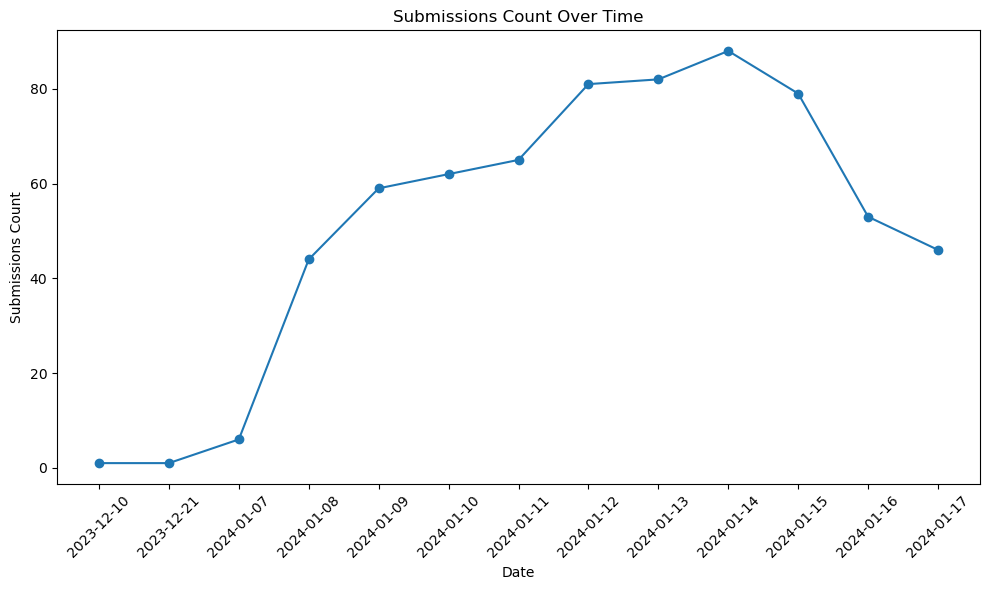

In [17]:
submission_counts = df['Temps de création'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(submission_counts.index, submission_counts.values, marker='o', linestyle='-')
plt.title('Submissions Count Over Time')
plt.xlabel('Date')
plt.ylabel('Submissions Count')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()
